In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *

from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [1]:
# General Imports
import numpy as np

# Visualisation Imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Hp\\Documents\\heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
inputs = df.drop(["Education","Income"],axis = "columns")
inputs.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [4]:
inputs.shape

(253680, 20)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(inputs, df.HeartDiseaseorAttack,test_size=0.3,random_state=21)

In [6]:
# Select

train_size = 2000

X_train = X_train[:train_size]
y_train = y_train[:train_size]

test_size = 400

X_test = X_test[:test_size]
y_test = y_test[:test_size]


In [7]:
# Reduce dimensions
n_dim = 2
pca = PCA(n_components=n_dim).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [8]:
X_train.shape

(2000, 2)

In [9]:
# Normalise
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [10]:
# Scale
samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

In [11]:
feature_dim = np.array(X_train).shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement='circular')
feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [13]:
from qiskit.algorithms.optimizers import COBYLA
cobyla = COBYLA(maxiter=500, tol=0.001)

In [16]:
from qiskit.circuit.library import EfficientSU2, RealAmplitudes

var_circuit = EfficientSU2(n_dim, reps=2)

In [18]:
from IPython.display import clear_output
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [19]:
from qiskit.providers.fake_provider import FakeBelemV2

backend = FakeBelemV2()
# initilizing backend
seed = 10598
#backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}
from qiskit_machine_learning.algorithms.classifiers import neural_network_classifier
from qiskit_machine_learning.algorithms import VQC
# creating a quantum instance
from qiskit.utils.quantum_instance import QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed) #, backend_options=backend_options)

#initilizing VQC object
vqc = VQC(num_qubits=n_dim, feature_map=feature_map, ansatz=var_circuit, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5084\3560165862.py:15: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(num_qubits=n_dim, feature_map=feature_map, ansatz=var_circuit, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)


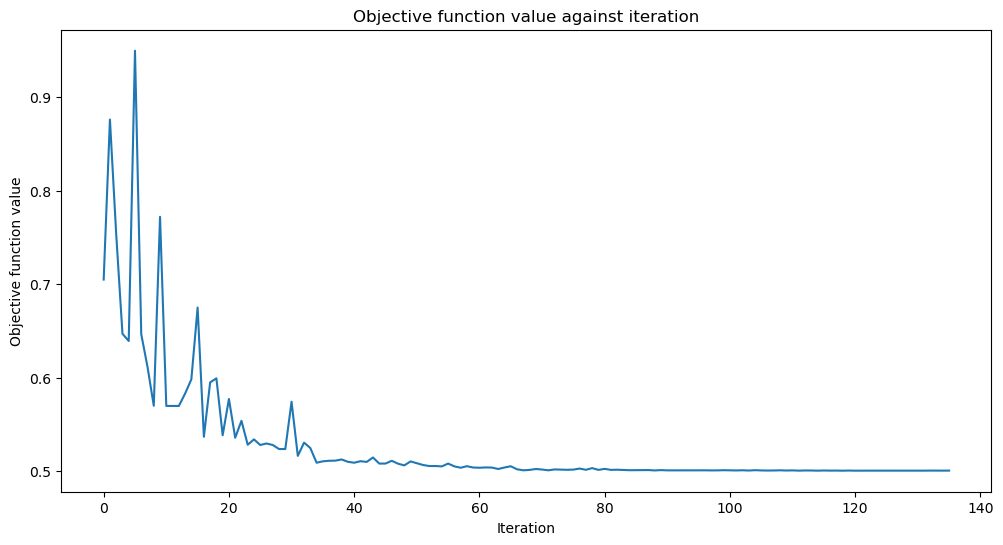

0.8825

In [21]:
import time
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

# fit classifier to data
vqc.fit(np.array(X_test), np.array(y_test))

elapsed = time.time() - start
# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(np.array(X_test), np.array(y_test))



In [22]:
print(f"Training time: {round(elapsed)} seconds")

Training time: 1678 seconds


In [23]:
train_score_q2_eff = vqc.score(X_train, y_train)
test_score_q2_eff = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset : {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset :     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset : 0.89
Quantum VQC on the test dataset :     0.88
